# A double slit experiment

<b>Author</b> Audun Skau Hansen <a href="mailto:a.s.hansen@kjemi.uio.no">✉️</a> 

The Hylleraas Centre for Quantum Molecular Sciences, 2022

---

Richard Feynman once famously claimed that exerything in quantum mechanics can be understood in light of the double slit experiment. In his own words, it **"contains the only mystery"** of quantum physics. 

If this is true, it is (perhaps) good news. It means that all we have to do to master quantum physics is to properly simulate the double slit experiment, and derive all insight from our results. So let's do just that. And maybe we'll steer clear of profound philosophical conundrums along the way.

## A classical wave in a box

In the following simulations we shall use the wavebox extension of BubbleBox:

In [1]:
import bubblebox as bb
from bubblebox.wavebox import boundaries_edge
import numpy as np
import matplotlib.pyplot as plt

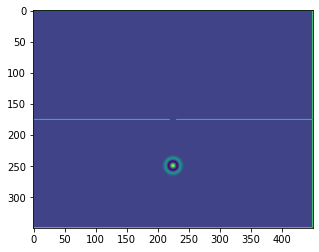

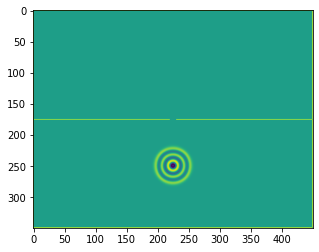

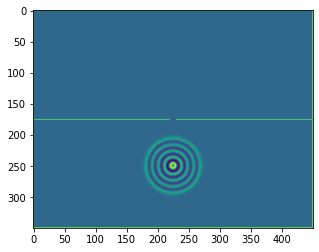

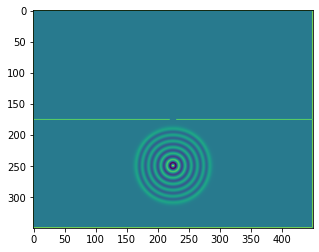

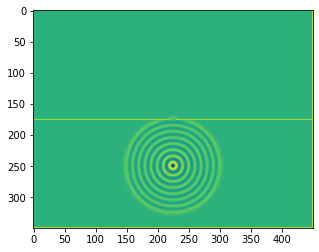

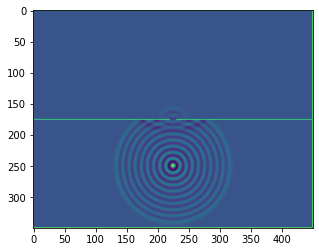

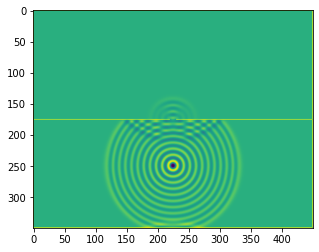

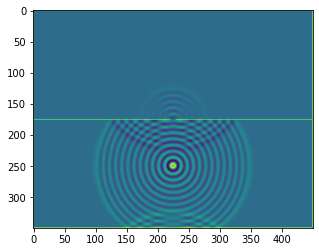

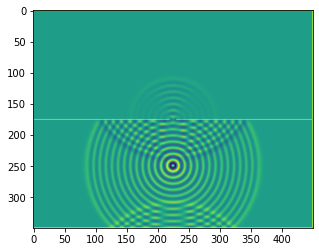

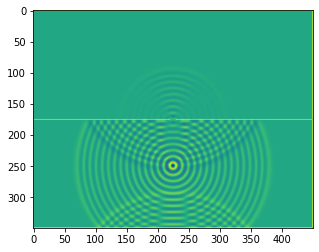

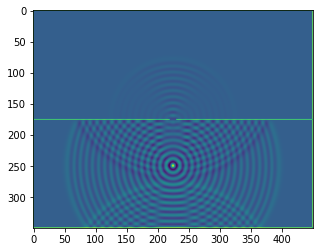

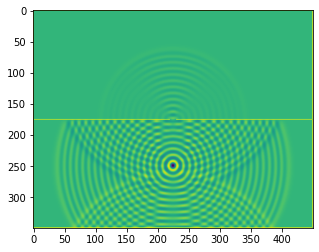

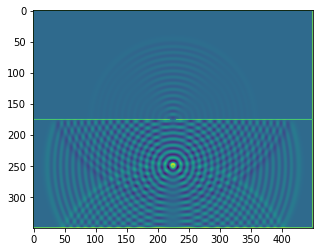

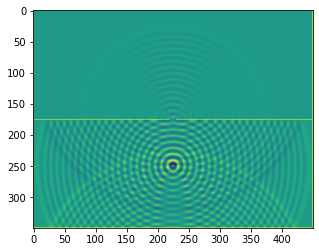

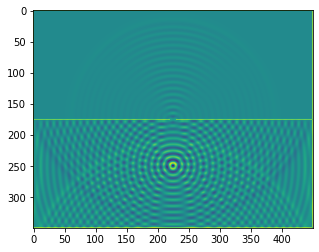

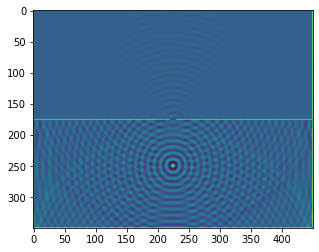

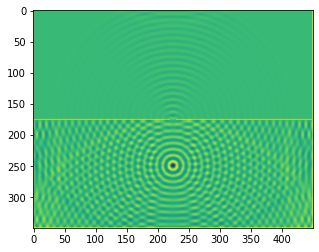

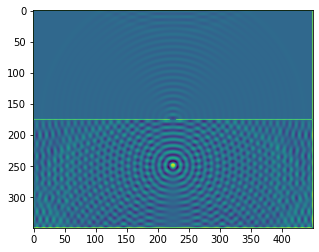

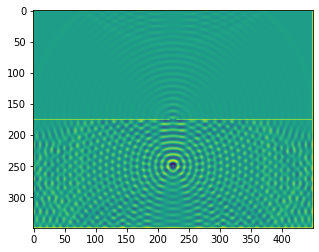

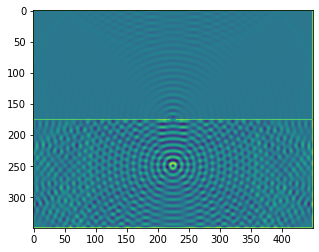

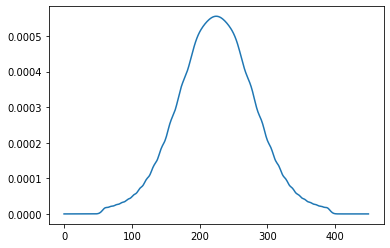

In [74]:
b = bb.wavebox(resolution = (350,450), size = (3.5,4.5))

# set initial state
#b.u = np.exp(-500*((b.x[0][:, None] - 1.5)**2 + b.x[1][None,:]**2)) 


def boundaries_single_slit(resolution, slitwidth = 5):
    bo = np.zeros(resolution, dtype = bool)
    bo[:, 0] = True
    bo[:, -1] = True
    bo[int(resolution[0]/2), :int(resolution[1]/2)-slitwidth] = True
    bo[int(resolution[0]/2), int(resolution[1]/2)+slitwidth:] = True
    bo[0,:] = True
    bo[-1,:] = True
    return bo
    
    
def source(t):
    return 20*np.exp(-500*((b.x[0][:, None] - 1.5)**2 + b.x[1][None,:]**2))*np.sin(25*t)
    
    
b.source = source

# set boundary conditions
b.set_neumann_boundary_conditions(boundaries_single_slit(b.resolution))

interference_pattern = np.zeros(b.resolution[1], dtype = float)
for i in range(20):

    for j in range(80):
        b.advance()
    
        interference_pattern += b.u[1]**2

    plt.figure()
    plt.imshow(b.representation())
    plt.show()
    
plt.figure()
plt.plot(interference_pattern)
plt.show()

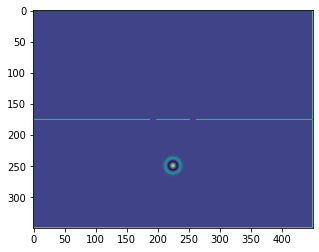

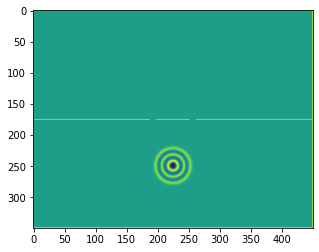

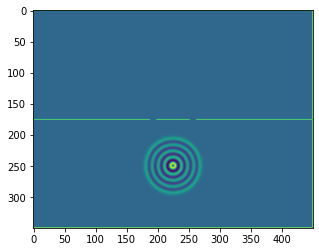

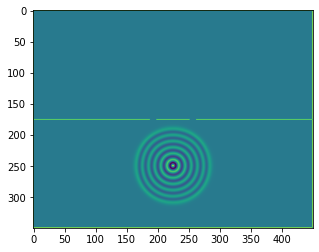

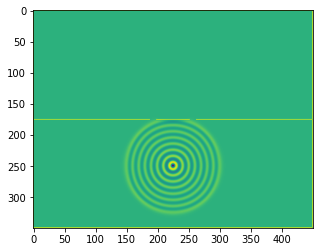

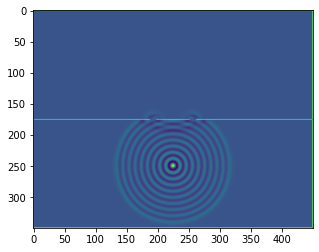

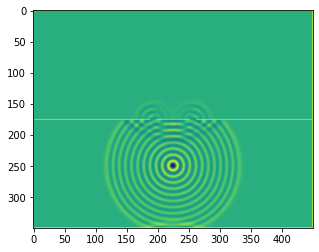

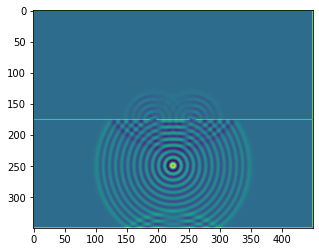

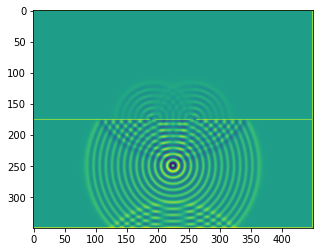

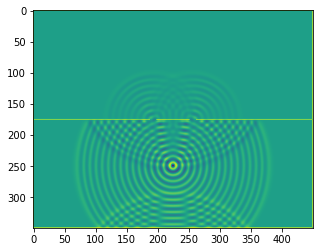

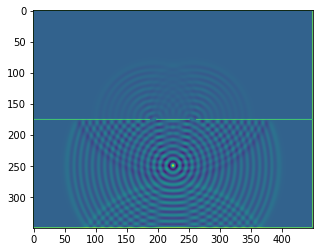

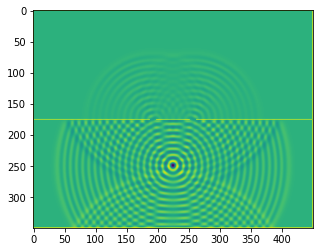

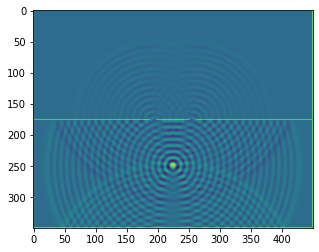

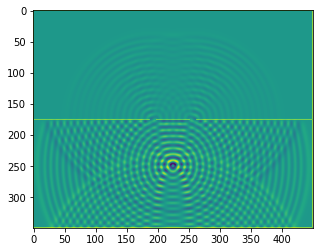

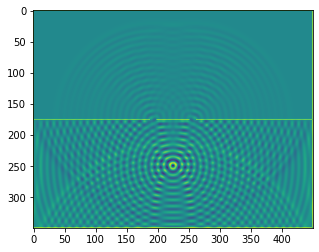

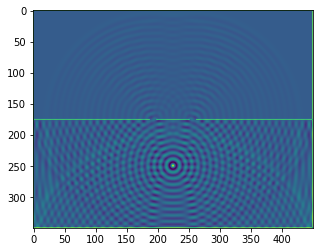

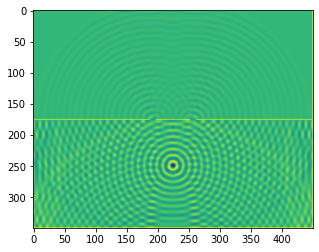

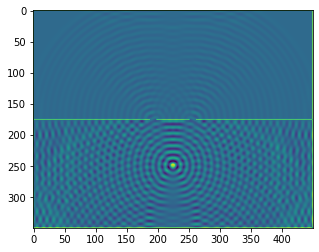

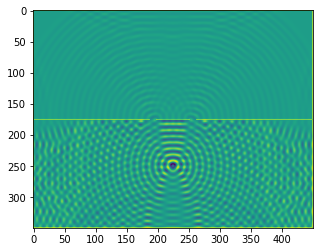

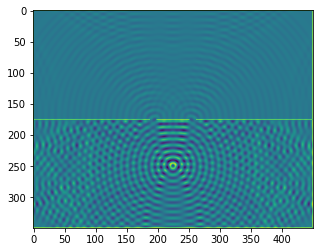

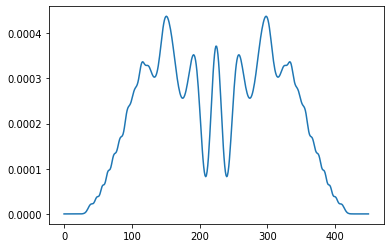

In [75]:
def boundaries_double_slit(resolution, slitwidth = 5, slit_separation = 32):
    bo = np.zeros(resolution, dtype = bool)
    bo[:, 0] = True
    bo[:, -1] = True
    bo[int(resolution[0]/2), :]=True
    
    
    bo[int(resolution[0]/2), int(resolution[1]/2)-slit_separation-slitwidth:int(resolution[1]/2)-slit_separation+slitwidth] = False
    
    bo[int(resolution[0]/2), int(resolution[1]/2)+slit_separation-slitwidth:int(resolution[1]/2)+slit_separation+slitwidth] = False
    
    bo[0,:] = True
    bo[-1,:] = True
    return bo
    
b = bb.wavebox(resolution = (350,450), size = (3.5,4.5))


# set initial state
#b.u = np.exp(-500*((b.x[0][:, None] - 1.5)**2 + b.x[1][None,:]**2)) 

#b.potential = lambda 
    
def source(t):
    return 20*np.exp(-500*((b.x[0][:, None] - 1.5)**2 + b.x[1][None,:]**2))*np.sin(25*t)
b.source = source
    
# set boundary conditions
b.set_neumann_boundary_conditions(boundaries_double_slit(b.resolution))

interference_pattern = np.zeros(b.resolution[1], dtype = float)
for i in range(20):

    for j in range(80):
        b.advance()
    
        interference_pattern += b.u[1]**2

    plt.figure()
    plt.imshow(b.representation())
    plt.show()
    
plt.figure()
plt.plot(interference_pattern)
plt.show()